# **HOMEWORK 1: Gradient Descent**

Optimization 1 (eta=0.05): [0.         0.3        0.57       0.813      1.0317     1.22853
 1.405677   1.5651093  1.70859837 1.83773853 1.95396468 2.05856821
 2.15271139 2.23744025 2.31369623 2.3823266  2.44409394 2.49968455
 2.54971609 2.59474448 2.63527004 2.67174303 2.70456873 2.73411186
 2.76070067 2.7846306  2.80616754 2.82555079 2.84299571 2.85869614
 2.87282653 2.88554387 2.89698949 2.90729054 2.91656148 2.92490533
 2.9324148  2.93917332 2.94525599 2.95073039 2.95565735 2.96009162
 2.96408245 2.96767421 2.97090679 2.97381611 2.9764345  2.97879105
 2.98091194 2.98282075 2.98453867]
Optimization 2 (eta=0.2): [0.         1.2        1.92       2.352      2.6112     2.76672
 2.860032   2.9160192  2.94961152 2.96976691 2.98186015 2.98911609
 2.99346965 2.99608179 2.99764908 2.99858945 2.99915367 2.9994922
 2.99969532 2.99981719 2.99989032 2.99993419 2.99996051 2.99997631
 2.99998578 2.99999147 2.99999488 2.99999693 2.99999816 2.99999889
 2.99999934 2.9999996  2.99999976 2.99999986 2.9

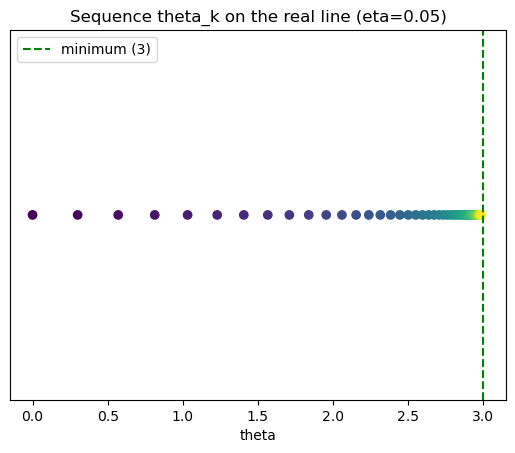

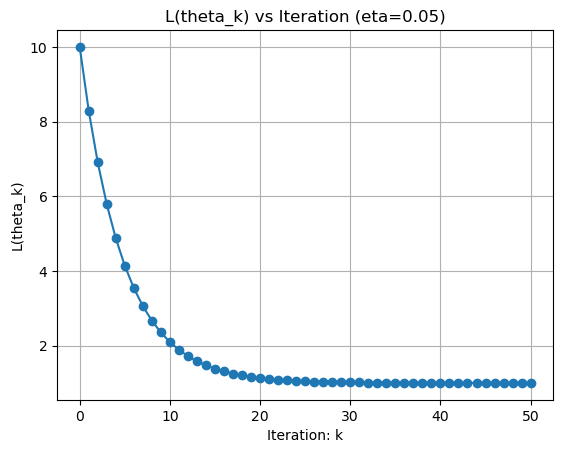

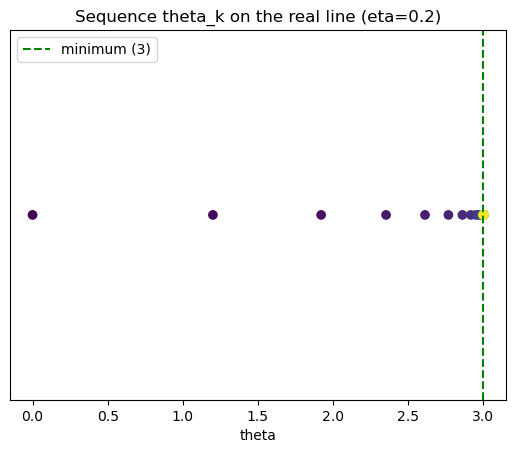

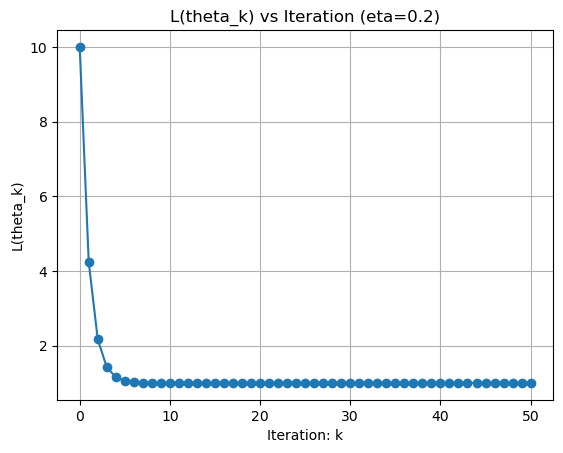

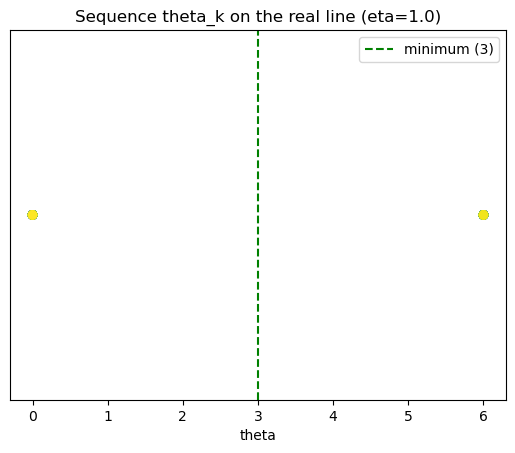

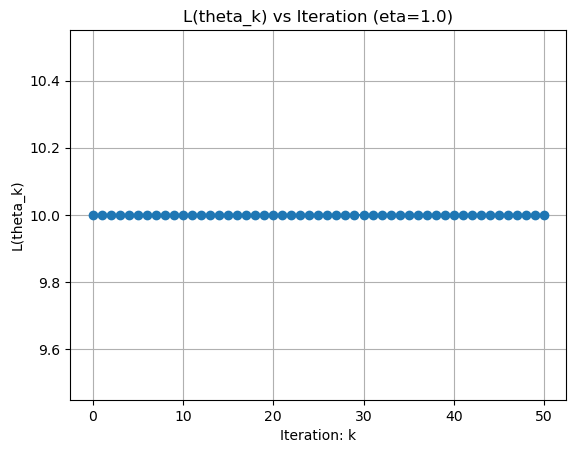

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#EXERCISE 1: GD on a 1D Function

def l(theta): 
    return  (theta - 3)**2 + 1

def grad_l(theta):
    return 2*theta - 6

def GD(l, grad_l, theta_0, eta, maxit):
    theta_k = [theta_0] 
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)
        theta_k.append(theta)
        theta_0 = theta
    return np.array(theta_k)

theta_0 = 0
eta_values = [0.05, 0.2, 1.0]
maxit = 50

theta_opt1 = GD(l,grad_l,theta_0,eta_values[0],maxit)
theta_opt2 = GD(l,grad_l,theta_0,eta_values[1],maxit)
theta_opt3 = GD(l,grad_l,theta_0,eta_values[2],maxit)

print(f"Optimization 1 (eta=0.05): {theta_opt1}\nOptimization 2 (eta=0.2): {theta_opt2}\nOptimization 3 (eta=1.0): {theta_opt3}")

for eta in eta_values:
    thetas_opt = GD(l,grad_l,theta_0,eta,maxit)
    L_vals = l(thetas_opt)
    iteration = np.arange(len(thetas_opt))

    plt.figure()
    plt.axvline(x=3, color='g', linestyle='--', label='minimum (3)')
    plt.scatter(thetas_opt, np.zeros_like(thetas_opt), c=iteration)
    plt.yticks([])
    plt.xlabel('theta')
    plt.title(f'Sequence theta_k on the real line (eta={eta})')
    plt.legend()

    plt.figure()
    plt.plot(iteration, L_vals, marker='o')
    plt.xlabel('Iteration: k')
    plt.ylabel('L(theta_k)')
    plt.title(f'L(theta_k) vs Iteration (eta={eta})')
    plt.grid(True)

plt.show()

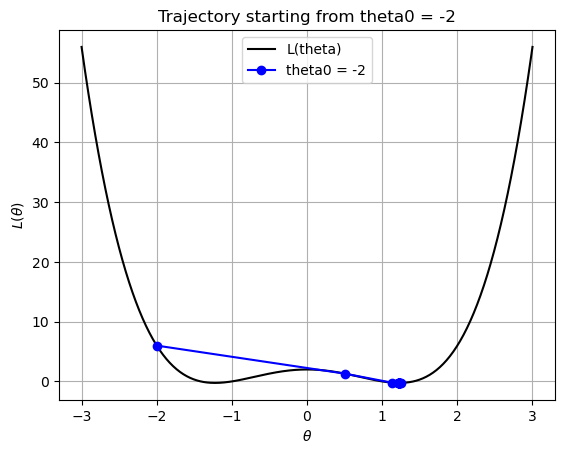

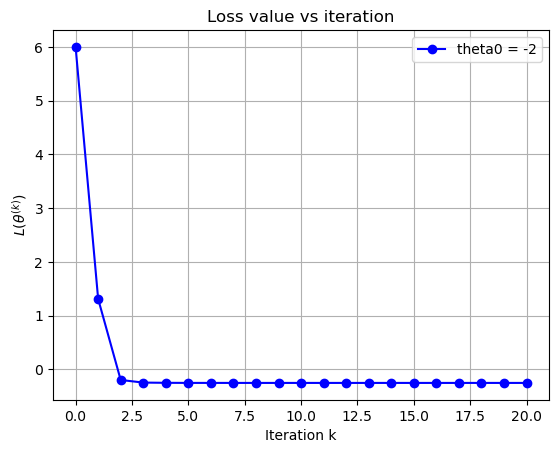

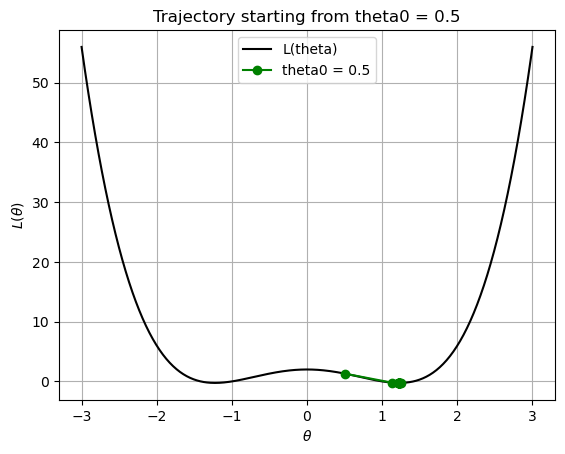

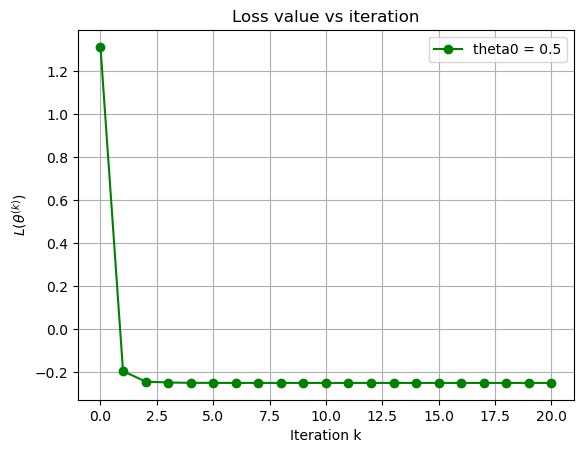

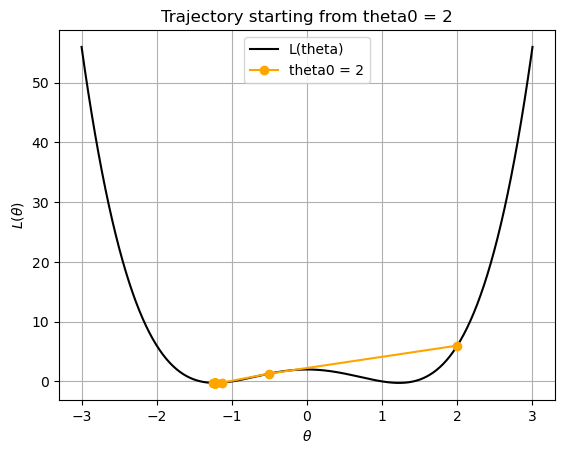

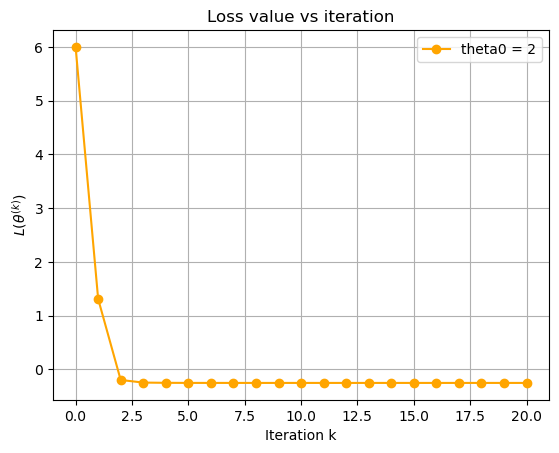

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# EXERCISE 2: BACKTRACKING LINE SEARCH

def l(theta): 
    return  theta**4 - 3*(theta**2) + 2

def grad_l(theta):
    return 4*(theta**3) - 6*theta 
    
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    eta = eta0 
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)

    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:  
        eta *= beta
    return eta

def GD_backtracking(l, grad_l, theta_0, eta0, maxit):
    thetas = [theta_0]
    theta = theta_0
    for k in range(maxit):
        eta = backtracking(l,grad_l,theta,eta0)
        theta = theta - eta * grad_l(theta)
        thetas.append(theta)
    return np.array(thetas)

thetas_0 = [-2, 0.5, 2]
maxit = 20
eta0 = 1.0
traj = {}

colors = ["blue","green","orange"]
color = 0
for theta_0 in thetas_0:
    traj[theta_0] = GD_backtracking(l, grad_l, theta_0, eta0, maxit)

    theta_grid = np.linspace(-3, 3, 400)
    L_vals = l(theta_grid)
    traj_theta = traj[theta_0]
    plt.figure()
    plt.plot(theta_grid, L_vals, 'k-', label='L(theta)')
    plt.plot(traj_theta, l(traj_theta), 'o-', label=f'theta0 = {theta_0}', color=colors[color])
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$L(\theta)$')
    plt.title(f'Trajectory starting from theta0 = {theta_0}')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.plot(l(traj_theta), 'o-', label=f'theta0 = {theta_0}',  color=colors[color])
    plt.xlabel('Iteration k')
    plt.ylabel(r'$L(\theta^{(k)})$')
    plt.legend()
    plt.title('Loss value vs iteration')
    plt.grid(True)
    plt.show()

    color+=1

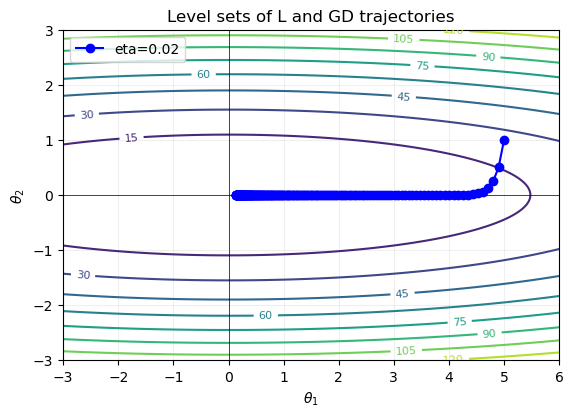

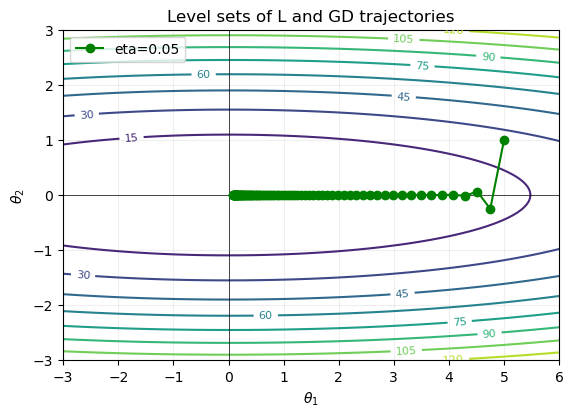

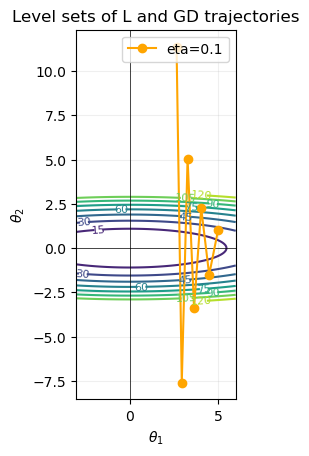

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#EXERCISE 3: GD in 2D

A = [[1.0, 0.0], [0.0, 25.0]]
A = np.array(A)  


def l(theta): 
    return 0.5 * theta.T @ A @ theta

def grad_l(theta):
    return np.array([theta[0], 25*theta[1]])

def GD(l, grad_l, theta_0, eta, maxit):
    thetas = [theta_0.copy()]
    theta = theta_0.copy()
    for k in range(maxit):
        theta = theta - eta * grad_l(theta)
        thetas.append(theta.copy())
    return np.array(thetas)

theta_0 = np.array([5.0,1.0])
etas = [0.02, 0.05, 0.1]
maxits = [180, 80, 6]
traj = {}

for eta, maxit in zip(etas, maxits):
    traj[eta] = GD(l, grad_l, theta_0, eta, maxit)

def quad_levelsets(A, xlim=(-3,6), ylim=(-3,3), ngrid=400, ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2) 
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)


colors = ["blue","green","orange"]
color = 0
for eta, theta_path in traj.items():
    plt.figure()
    quad_levelsets(A, title="Level sets of L and GD trajectories")
    plt.plot(theta_path[:,0], theta_path[:,1], 'o-', label=f'eta={eta}', color=colors[color])
    plt.legend()
    color+=1

plt.show()


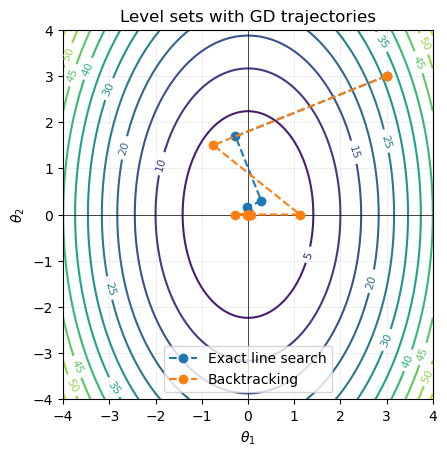

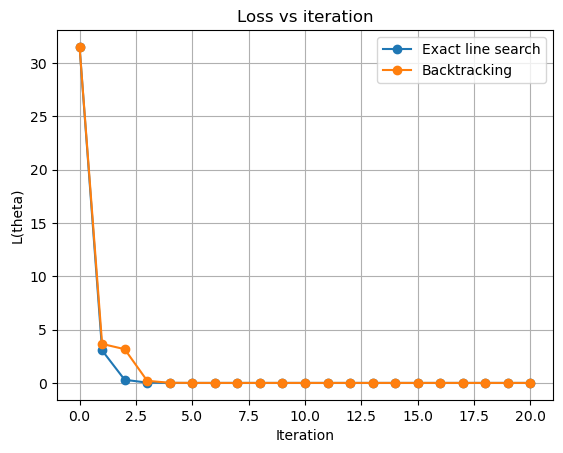

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#EXERCISE 4: Exact Line Search vs Backtracking

A = np.array([[5,0],[0,2]])

def l(theta):
    return 0.5 * theta.T @ A @ theta

def grad_l(theta):
    return A@theta

def GD_exact(l, grad_l, theta_0, maxit):
    thetas = [theta_0.copy()]
    theta = theta_0.copy()
    for k in range(maxit):
        g_k = grad_l(theta)
        exact_eta_k = (g_k.T @ g_k)/(g_k.T @ A @ g_k)
        theta = theta - exact_eta_k * g_k
        thetas.append(theta.copy())
    return np.array(thetas)


# BACKTRACKING:
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    eta = eta0 
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:   
        eta *= beta
    return eta

def GD_backtracking(l, grad_l, theta_0, eta0, maxit):
    thetas = [theta_0.copy()]
    theta = theta_0.copy()
    for k in range(maxit):
        eta = backtracking(l,grad_l,theta,eta0)
        theta = theta - eta * grad_l(theta)
        thetas.append(theta.copy())
    return np.array(thetas)

theta_0 = np.array([3.0,3.0])
maxit = 20

traj_exact = GD_exact(l, grad_l, theta_0, maxit)
traj_back  = GD_backtracking(l, grad_l, theta_0, eta0=1.0, maxit=maxit)

def quad_levelsets(A, xlim=(-4,4), ylim=(-4,4), ngrid=400, ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)  
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)


plt.figure()
quad_levelsets(A, 
               title="Level sets with GD trajectories")
plt.plot(traj_exact[:,0], traj_exact[:,1], 'o--', label='Exact line search')
plt.plot(traj_back[:,0],  traj_back[:,1],  'o--', label='Backtracking')
plt.legend()
plt.show()

loss_exact = np.array([l(theta) for theta in traj_exact])
loss_back  = np.array([l(theta) for theta in traj_back])

plt.figure()
plt.plot(loss_exact, 'o-', label='Exact line search')
plt.plot(loss_back,  'o-', label='Backtracking')
plt.xlabel("Iteration")
plt.ylabel("L(theta)")
plt.title("Loss vs iteration")
plt.legend()
plt.grid(True)
plt.show()

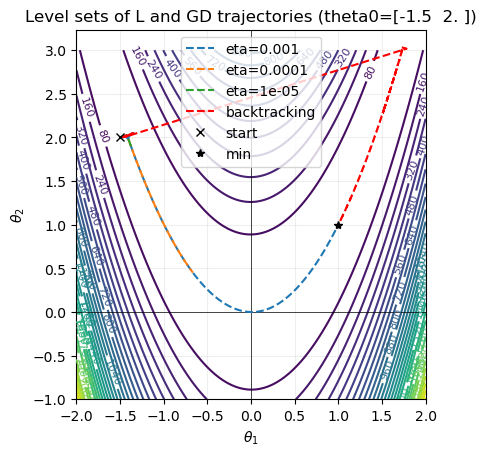

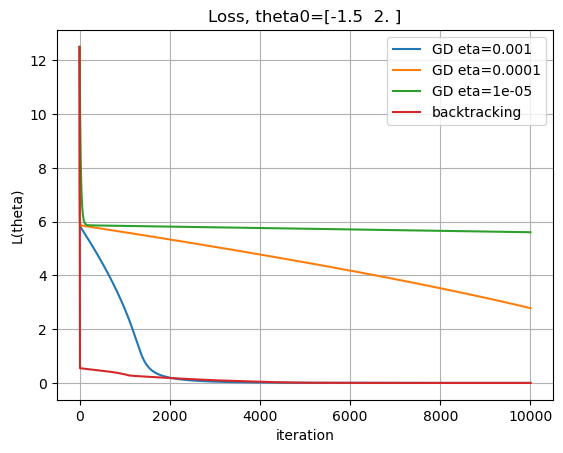

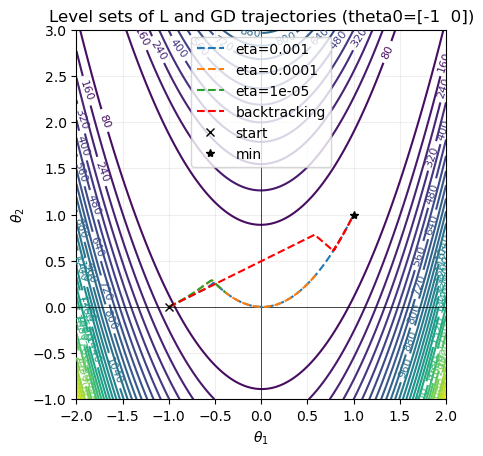

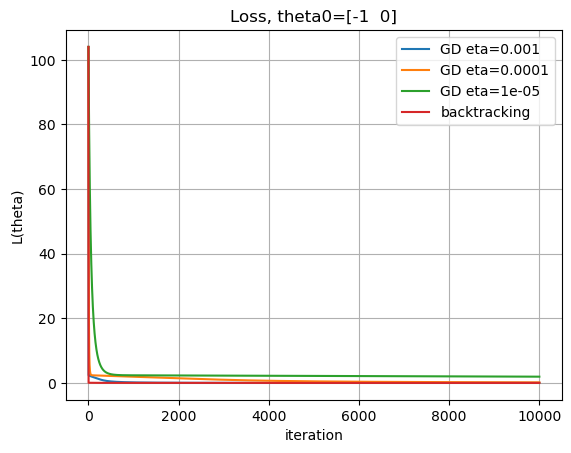

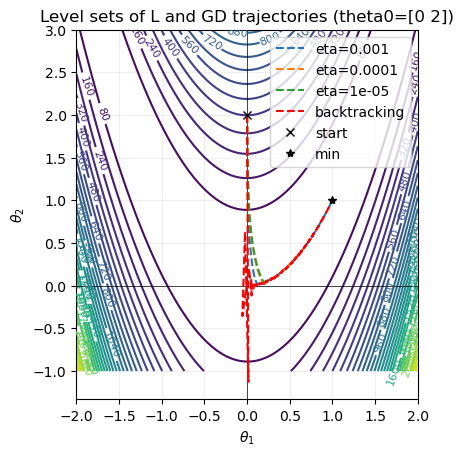

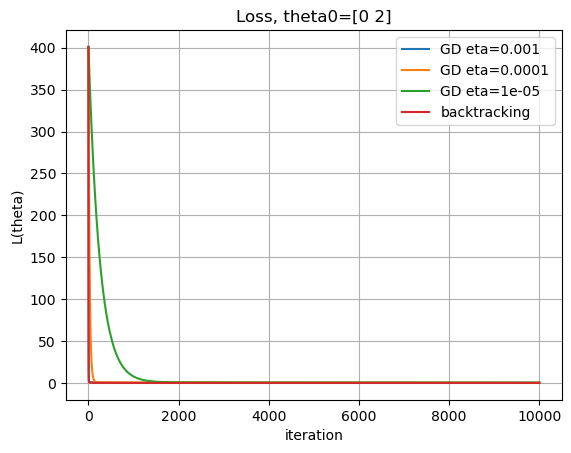

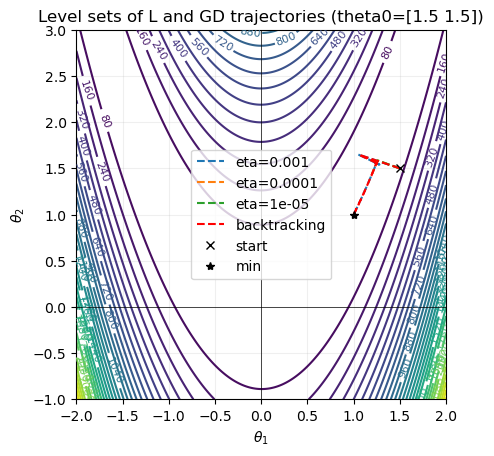

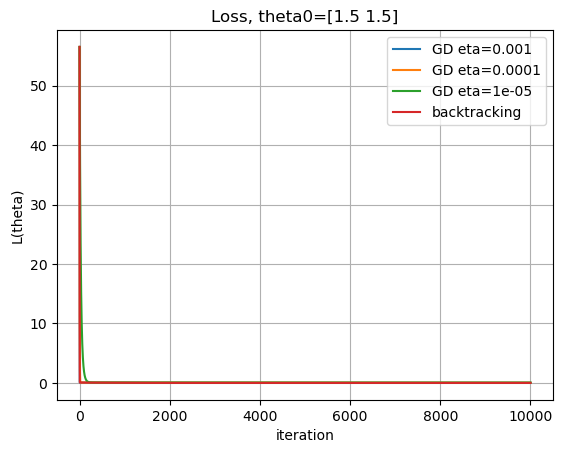


Start theta0 = [-1.5  2. ]
  GD eta=0.001: theta_last=[0.99020202 0.98046061], L_last=9.616e-05
  GD eta=0.0001: theta_last=[-0.66593918  0.45147674], L_last=2.782e+00
  GD eta=1e-05: theta_last=[-1.3664726   1.87488363], L_last=5.606e+00
  Backtracking: theta_last=[1.00039591 1.0007949 ], L_last=1.576e-07

Start theta0 = [-1  0]
  GD eta=0.001: theta_last=[0.99374283 0.98749967], L_last=3.922e-05
  GD eta=0.0001: theta_last=[0.59120872 0.34750822], L_last=1.675e-01
  GD eta=1e-05: theta_last=[-0.38937886  0.15839776], L_last=1.935e+00
  Backtracking: theta_last=[0.99996871 0.99993716], L_last=9.858e-10

Start theta0 = [0 2]
  GD eta=0.001: theta_last=[0.99449844 0.98900505], L_last=3.032e-05
  GD eta=0.0001: theta_last=[0.69278484 0.47849101], L_last=9.459e-02
  GD eta=1e-05: theta_last=[0.29210306 0.08224507], L_last=5.021e-01
  Backtracking: theta_last=[0.99996051 0.99992105], L_last=1.560e-09

Start theta0 = [1.5 1.5]
  GD eta=0.001: theta_last=[1.00679995 1.01367325], L_last=4.63

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#EXERCISE 5: Gradient Descent on the Rosenbrock Function

def l(theta):
    return (1-theta[0])**2 + 100*(theta[1] - theta[0]**2)**2

def grad_l(theta):
    return np.array([
        2*(theta[0] - 1) + 400*(theta[0]**3 - theta[0]*theta[1]),
        200*(theta[1] - theta[0]**2)
    ])

def GD(l, grad_l, theta_0, eta, maxit):
    thetas = [theta_0.copy()]
    theta = theta_0.copy()
    for k in range(maxit):
        theta = theta - eta * grad_l(theta)
        thetas.append(theta.copy())
    return np.array(thetas)

def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    eta = eta0 
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:  
        eta *= beta
    return eta

def GD_backtracking(l, grad_l, theta_0, eta0, maxit):
    thetas = [theta_0.copy()]
    theta = theta_0.copy()
    for k in range(maxit):
        eta = backtracking(l,grad_l,theta,eta0)
        theta = theta - eta * grad_l(theta)
        thetas.append(theta.copy())
    return np.array(thetas)

etas = [1e-3, 1e-4, 1e-5]
maxit = 10000
theta_0 = [np.array([-1.5,2]), np.array([-1,0]), np.array([0,2]), np.array([1.5,1.5])]

traj_const = {}
for eta in etas:
    traj_list = []
    for theta0 in theta_0:
        traj_list.append(GD(l,grad_l,theta0,eta,maxit))
    traj_const[eta] = traj_list 

traj_back  = [GD_backtracking(l, grad_l, t0, eta0=1.0, maxit=maxit) for t0 in theta_0]

def quad_levelsets(A, xlim=(-2,2), ylim=(-1,3), ngrid=400, ncontours=35, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = (1 - X)**2 + 100*(Y - X**2)**2 
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)



for i, t0 in enumerate(theta_0):
    plt.figure()
    quad_levelsets(None, title=f"Level sets of L and GD trajectories (theta0={t0})")

    for eta, paths in traj_const.items():
        theta_path = paths[i]             
        plt.plot(theta_path[:,0], theta_path[:,1], '--',
                 label=f'eta={eta:g}')

    theta_back_path = traj_back[i]
    plt.plot(theta_back_path[:,0], theta_back_path[:,1], '--',
             label='backtracking', color='red')

    plt.plot(t0[0], t0[1], 'kx', label='start')
    plt.plot(1, 1, 'k*', label='min')

    plt.legend()

    plt.figure()
    for eta in etas:
        losses_const = [l(th) for th in traj_const[eta][i]]
        plt.plot(losses_const,"-", label=f"GD eta={eta:g}")
    losses_back = [l(th) for th in traj_back[i]]
    plt.plot(losses_back,"-", label="backtracking")
    plt.title(f"Loss, theta0={t0}")
    plt.xlabel("iteration")
    plt.ylabel("L(theta)")
    plt.legend()
    plt.grid(True)
    plt.show()


for i, t0 in enumerate(theta_0):
    print(f"\nStart theta0 = {t0}")
    for eta in etas:
        last_theta = traj_const[eta][i][-1]
        print(f"  GD eta={eta:g}: theta_last={last_theta}, L_last={l(last_theta):.3e}")
    last_theta_b = traj_back[i][-1]
    print(f"  Backtracking: theta_last={last_theta_b}, L_last={l(last_theta_b):.3e}")
